<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
#!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 62.5MB/s]


In [17]:
import pandas as pd
import missingno as msngo
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0
764,2.0,122,70,27.0,0,36.8,0.340,27,0
765,5.0,121,72,23.0,112,26.2,0.245,30,0
766,1.0,126,60,0.0,0,30.1,0.349,47,1


In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [13]:
#add your code
data.isnull().sum() / len(data) * 100 

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [14]:
#add your code
data.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Axes: >

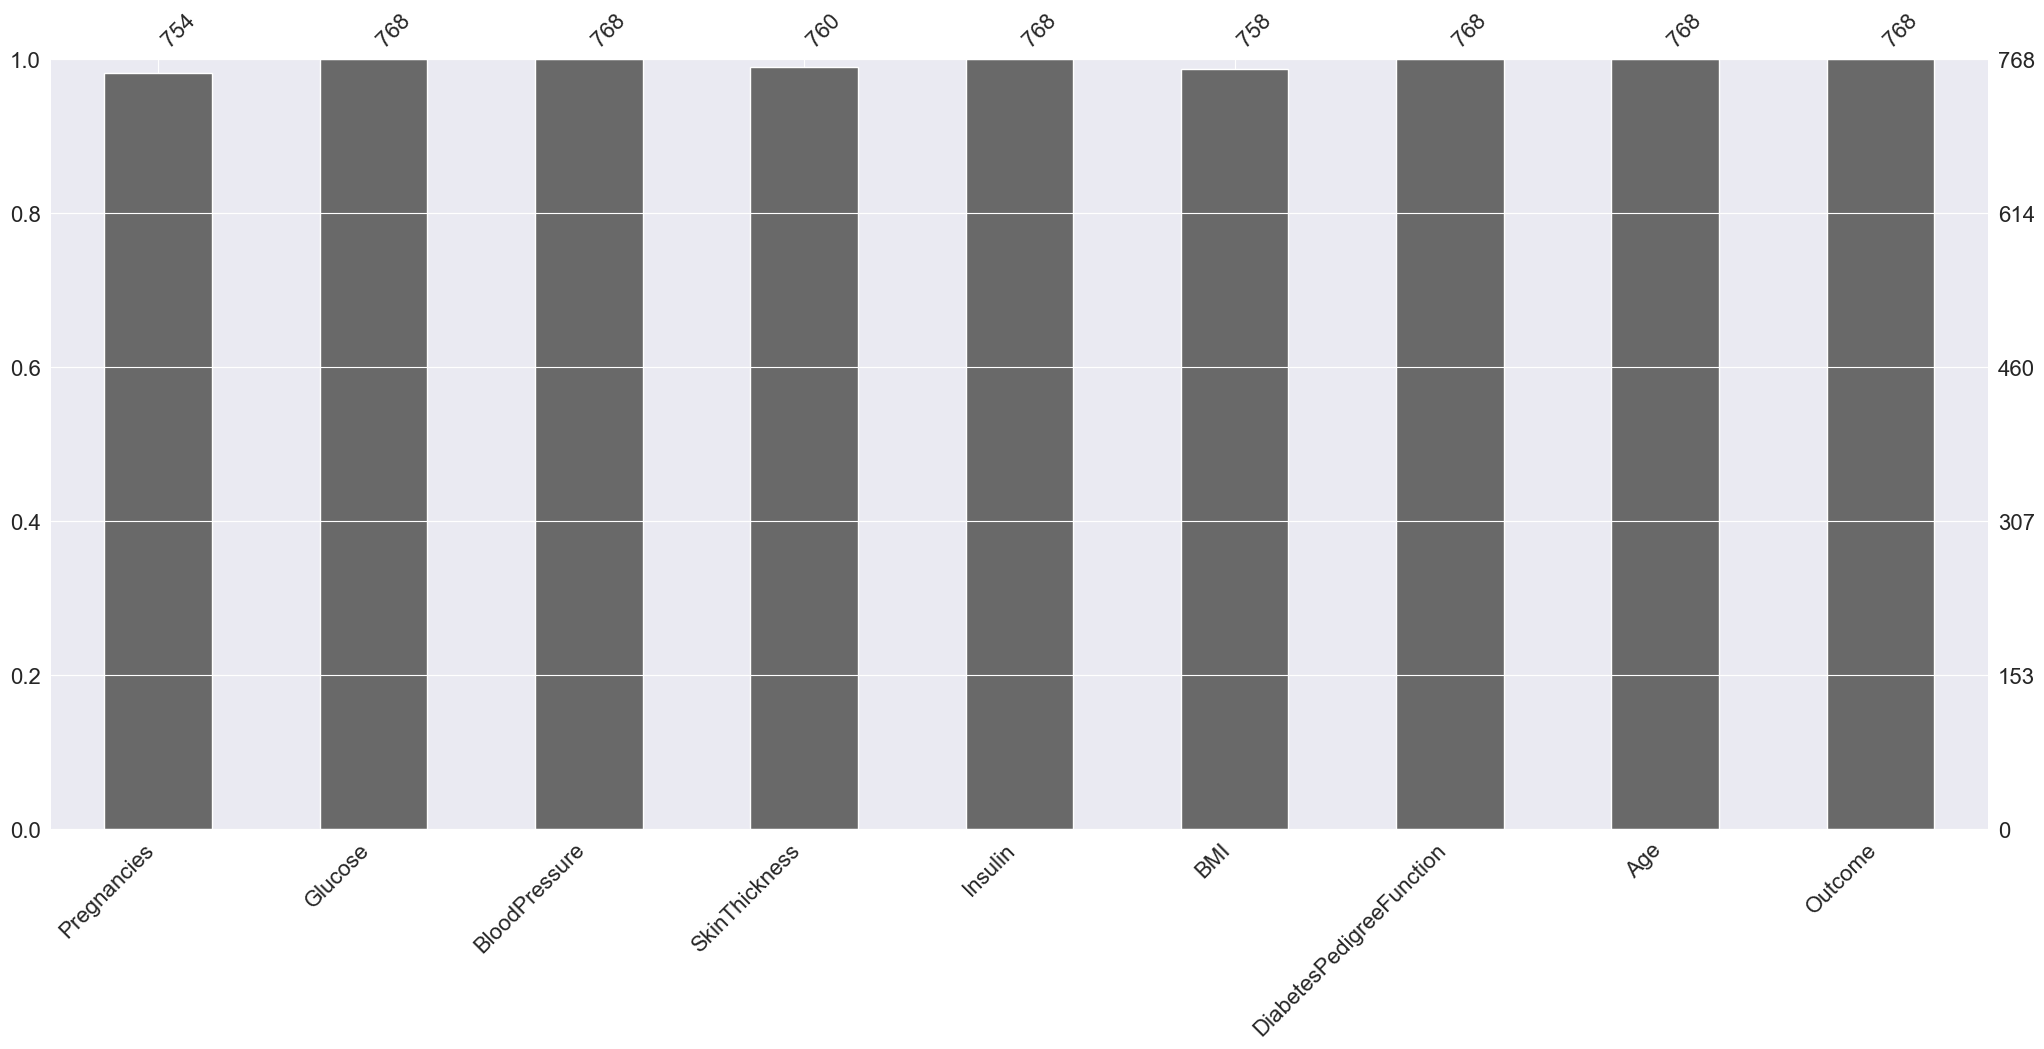

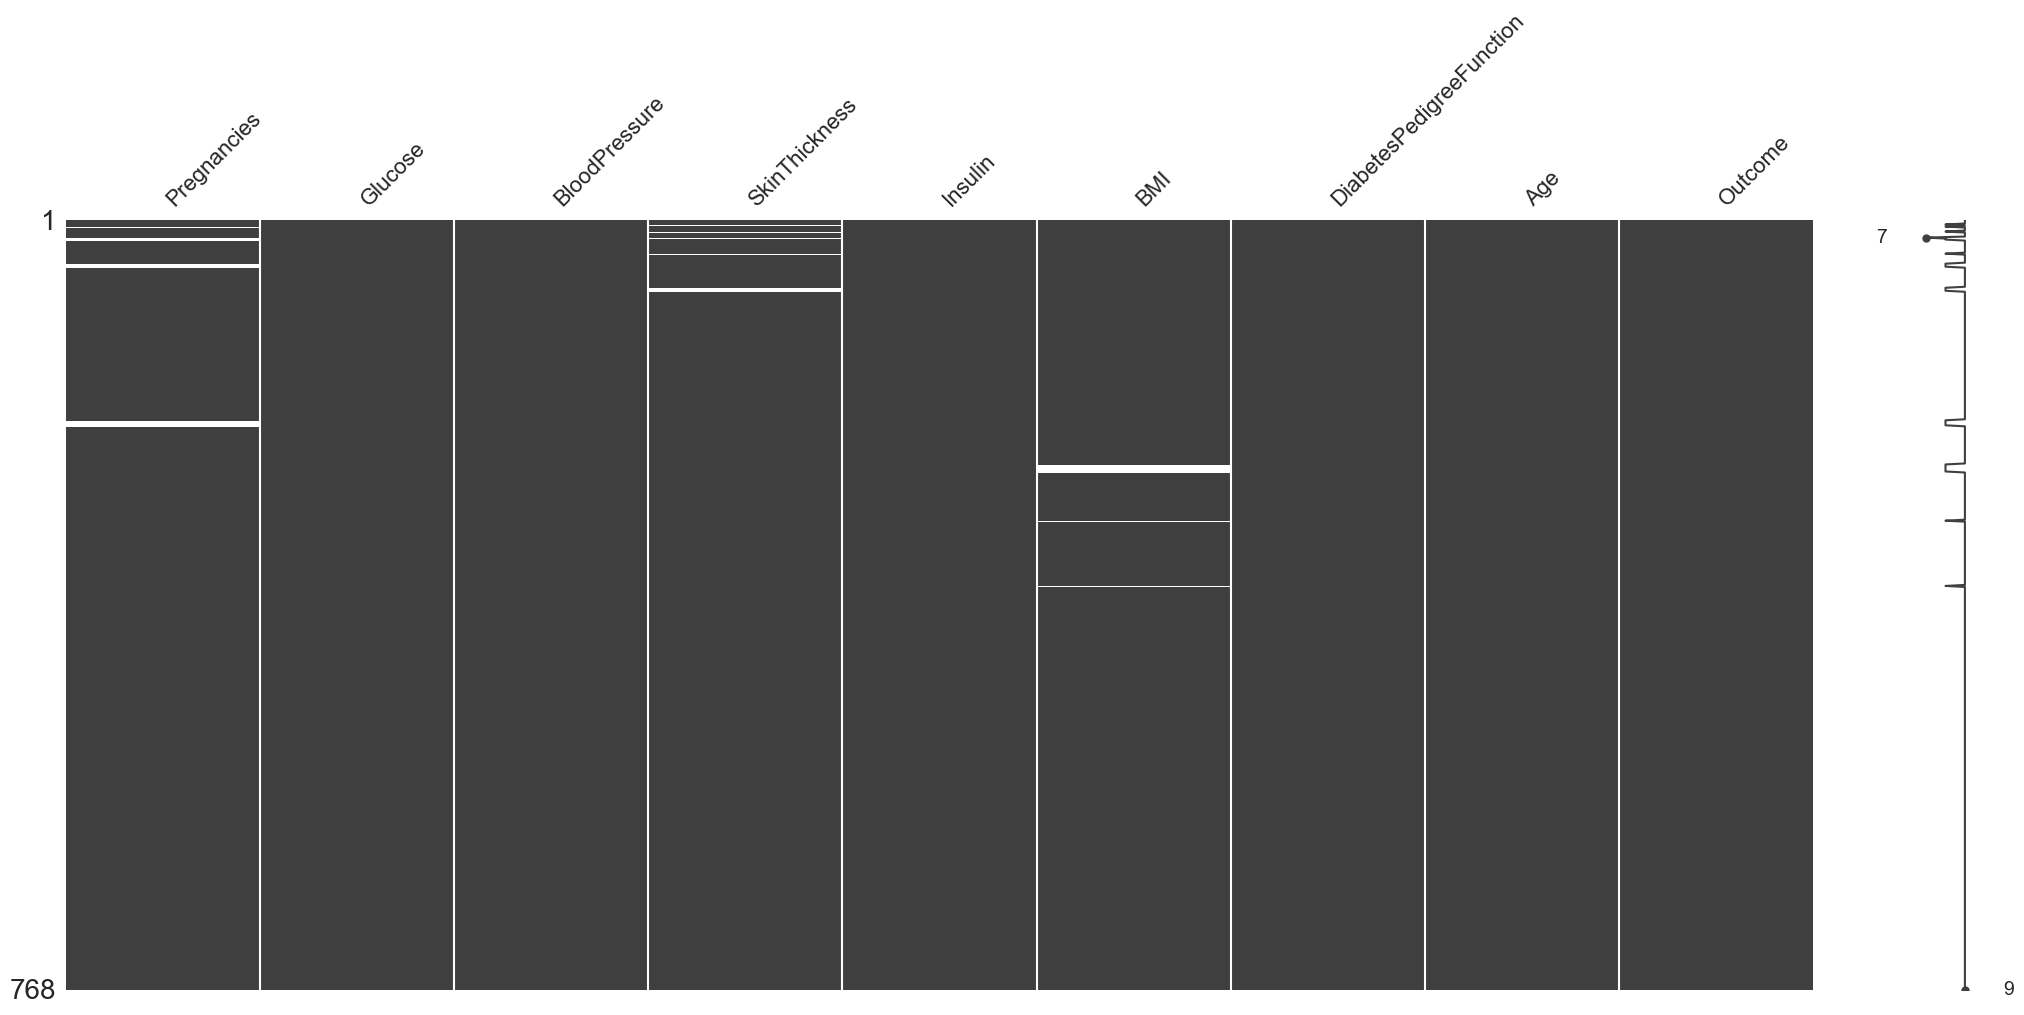

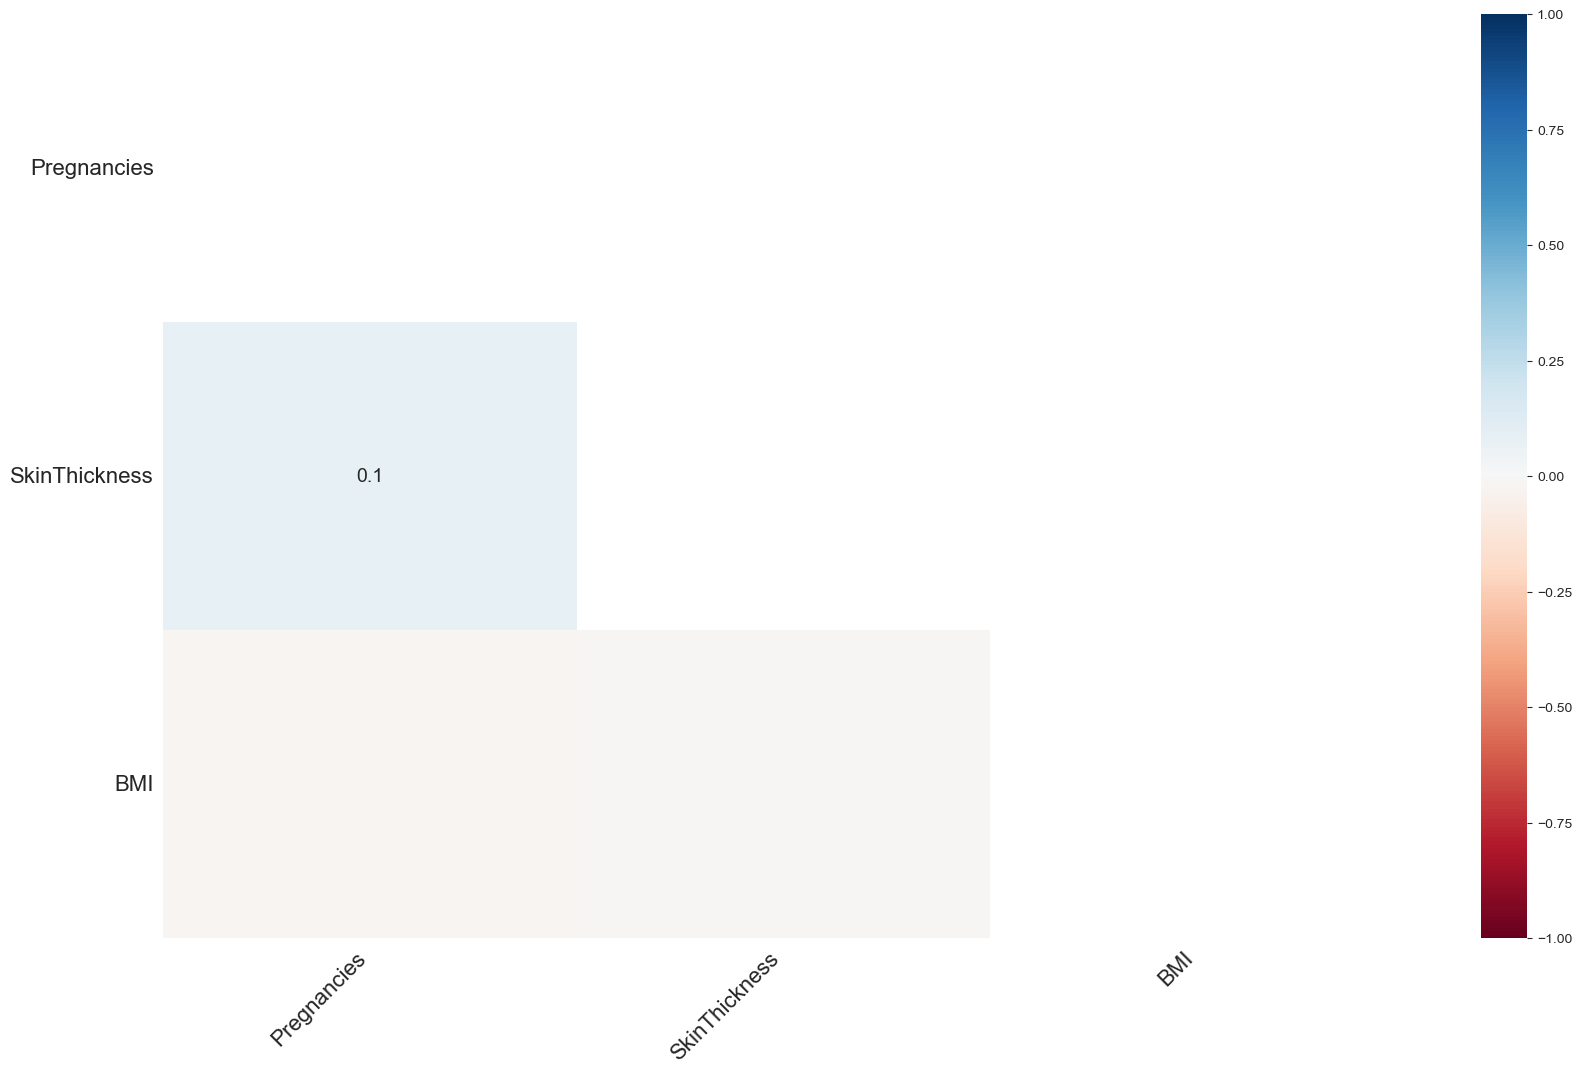

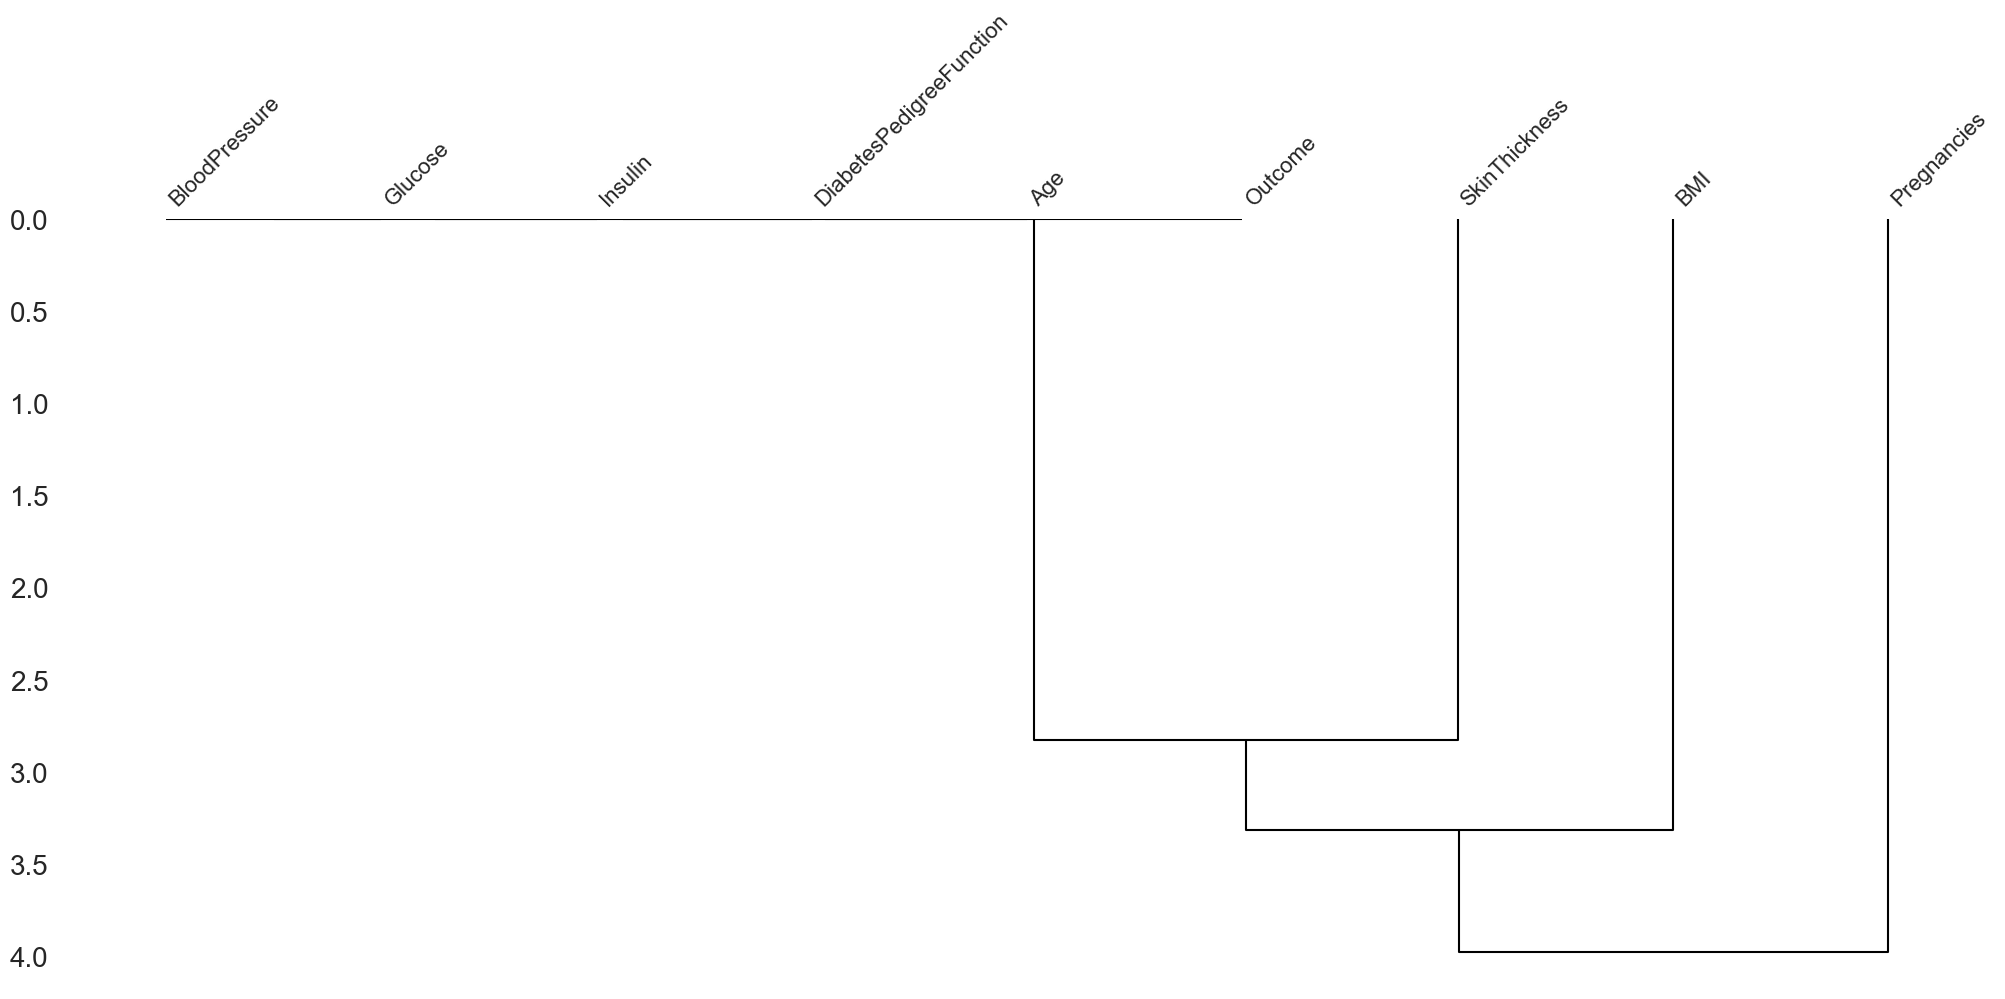

In [15]:
#add your code
msngo.bar(data)
msngo.matrix(data)
msngo.heatmap(data)
msngo.dendrogram(data)

## <font color = 'Orange'>Handle the missing values</font>

<Axes: ylabel='Frequency'>

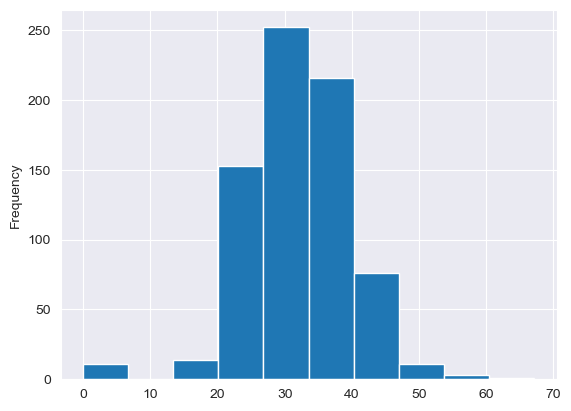

In [22]:
#add your code
#Because of small percent of missingnes and MCAR
data = data.dropna(subset=['Pregnancies', 'SkinThickness', 'BMI'], axis=0)
data.isnull().sum()
data.BMI.plot(kind='hist')

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [23]:
#add your code
data.to_csv('Diabetes.csv', index=False)

Print the first rows of your final Dataset

In [24]:
#add your code
data = pd.read_csv("diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [25]:
#add your code
target='Outcome'
X = data.drop([target],axis=1)
Y = data[target]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [26]:
#add your code
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [27]:
#add your code
y_pred = model.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [30]:
#add your code
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
f1_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        90
           1       0.79      0.64      0.70        58

    accuracy                           0.79       148
   macro avg       0.79      0.76      0.77       148
weighted avg       0.79      0.79      0.79       148

[[80 10]
 [21 37]]


0.7047619047619048

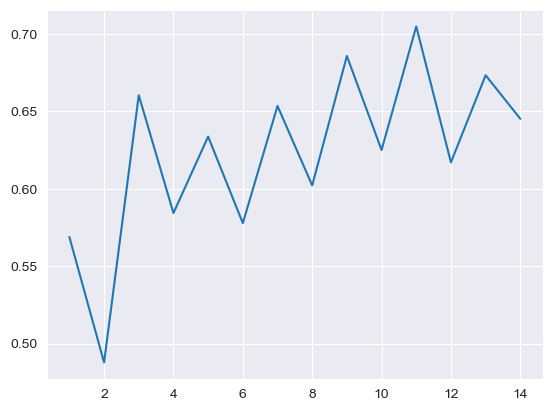

In [31]:
#Choosing the best k
f1_scores=[]
for i in range(1,15):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(Y_test,y_pred))

import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)],f1_scores)